# Batch Normalization

## Target
- Add `Batch Normalization` to improve rate of convergence and overall accuracy after 15 epochs.

## Results
- Total parameters: 7,624
- Best Training Accuracy: 99.44% at 15th Epoch
- Best Testing Accuracy: 99.19% at 13th Epoch

## Analysis
- Using of Batch Normalization the accuracy increase through the epochs.
- Very slight overfitting is observed with a difference of ~0.05 between training and testing accuracies in the last 3 epochs.

## Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/S7'
%cd $BASE_DIR

Mounted at /content/drive
/content/drive/My Drive/S7


In [ ]:
from model_3 import Net, model_summary, model_train, model_test, draw_graphs

## Data Transformations

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Data Loaders

In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
            Conv2d-9           [-1, 16, 10, 10]           1,152
             ReLU-10           [-1, 16, 10, 10]               0
      BatchNorm2d-11           [-1, 16, 10, 10]              32
           Conv2d-12             [-1, 24, 8, 8]           3,456
             ReLU-13             [-1, 24, 8, 8]               0
      BatchNorm2d-14             [-1, 2

## Train & test

In [ ]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 1


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.10278309136629105 Batch_id=468 Accuracy=92.58: 100%|██████████| 469/469 [00:18<00:00, 25.45it/s]



Test set: Average loss: 0.0842, Accuracy: 9758/10000 (97.58%)

EPOCH: 2


Loss=0.023228920996189117 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:18<00:00, 25.44it/s]



Test set: Average loss: 0.0493, Accuracy: 9859/10000 (98.59%)

EPOCH: 3


Loss=0.08617061376571655 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:17<00:00, 26.53it/s]



Test set: Average loss: 0.0402, Accuracy: 9866/10000 (98.66%)

EPOCH: 4


Loss=0.053018033504486084 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:17<00:00, 26.73it/s]



Test set: Average loss: 0.0376, Accuracy: 9887/10000 (98.87%)

EPOCH: 5


Loss=0.008717082440853119 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:18<00:00, 25.31it/s]



Test set: Average loss: 0.0345, Accuracy: 9895/10000 (98.95%)

EPOCH: 6


Loss=0.02228676527738571 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:17<00:00, 26.65it/s]



Test set: Average loss: 0.0344, Accuracy: 9884/10000 (98.84%)

EPOCH: 7


Loss=0.010410250164568424 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:18<00:00, 25.14it/s]



Test set: Average loss: 0.0328, Accuracy: 9882/10000 (98.82%)

EPOCH: 8


Loss=0.017539585009217262 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:17<00:00, 26.57it/s]



Test set: Average loss: 0.0307, Accuracy: 9898/10000 (98.98%)

EPOCH: 9


Loss=0.0370723195374012 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:17<00:00, 26.49it/s]



Test set: Average loss: 0.0335, Accuracy: 9903/10000 (99.03%)

EPOCH: 10


Loss=0.015185151249170303 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:18<00:00, 25.68it/s]



Test set: Average loss: 0.0289, Accuracy: 9903/10000 (99.03%)

EPOCH: 11


Loss=0.007190249394625425 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:19<00:00, 23.95it/s]



Test set: Average loss: 0.0302, Accuracy: 9901/10000 (99.01%)

EPOCH: 12


Loss=0.040511880069971085 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:18<00:00, 25.33it/s]



Test set: Average loss: 0.0301, Accuracy: 9902/10000 (99.02%)

EPOCH: 13


Loss=0.058681193739175797 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:17<00:00, 26.80it/s]



Test set: Average loss: 0.0276, Accuracy: 9919/10000 (99.19%)

EPOCH: 14


Loss=0.006079513113945723 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:17<00:00, 26.48it/s]



Test set: Average loss: 0.0385, Accuracy: 9884/10000 (98.84%)

EPOCH: 15


Loss=0.005190931260585785 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:18<00:00, 25.58it/s]



Test set: Average loss: 0.0316, Accuracy: 9890/10000 (98.90%)



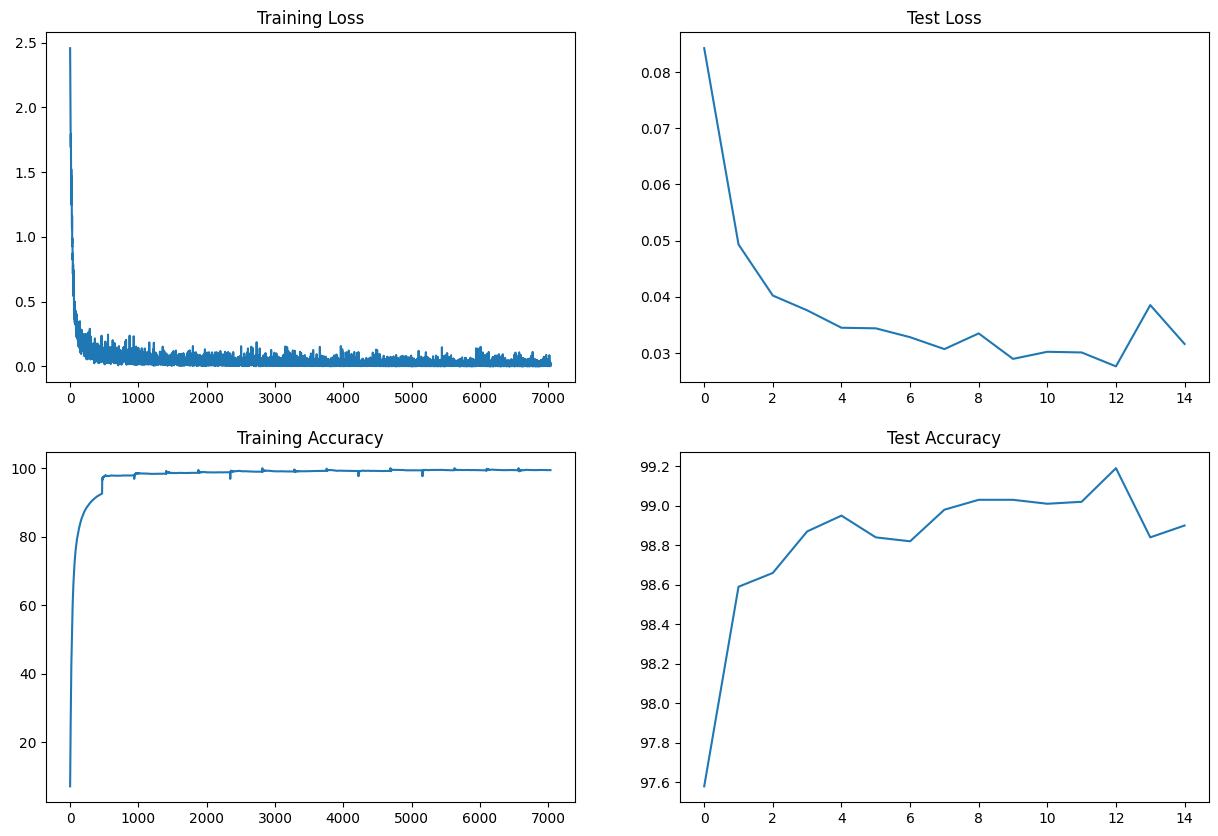

In [ ]:
draw_graphs()